## Modeling

Initializing everything that we would be needing throughout the notebook.

In [313]:
# Import all the tools we need

# Regular EDA (Exploratory data analysis) and ploting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# We want our plots to apear inside the notebook|
%matplotlib inline 

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #, AdaBoostClassifier, ExtraTreesClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, ClassificationReport, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve, FeatureImportances

## Importing Dataset that came from the University of California, Irvine

The Original Data came from Cleaveland data from the UCI ML repo but we are using the version that is available on Kaggle:
    https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [314]:
df = pd.read_csv("heart.csv")
print("=x"*40)
print("\n\n\n")
print(f"Heart Disease Data :\n\t\t{df.shape[0]} Number of Rows \n\t\t&\n\t\t{df.shape[1]} Number of Columns")
print("\n\n\n")
print("=x"*40)
# df.shape -> (rows, columns)

=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x




Heart Disease Data :
		1025 Number of Rows 
		&
		14 Number of Columns




=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x=x


In [315]:
# Split data into X and y
X = df.drop("target",axis=1)

y = df["target"]

In [316]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2)

Now We've got our data into training and test sets, its time to train and test the model<br>
We'll train it (findthe patterns) on the training set.<br>
And we'll test it (use the patterns) on the test set.<br>

We're going to try 3 different machine learning models-
> 1. Logistic Regression
> 2. K-Nearest Neighbour Classifier
> 3. Random Forest Classifier

In [317]:
df = pd.read_csv("heart.csv")

# Split data into X and y
X = df.drop("target",axis=1)
y = df["target"]
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2)

## StandardScaler:
1. The StandardScaler is used for feature scaling in machine learning. It standardizes features by removing the mean and scaling them to unit variance.
2. It transforms each feature independently, ensuring that they have a mean of 0 and a standard deviation of 1.
3. This scaling is essential for algorithms that are sensitive to the scale of features, such as gradient-based optimization methods (e.g., gradient descent).
4. It does not change the shape of the distribution; it only scales the data.

In [318]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [319]:
mean_std_values = {'mean': scaler.mean_, 'std': scaler.scale_}
with open('mean_std_values.pkl', 'wb') as f:
    pickle.dump(mean_std_values, f)

In [320]:
# Puts model into a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN":KNeighborsClassifier(), 
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    Models : a dict of different Sklearn ml models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit the model to data
        # model.feature_names = X.columns.tolist()
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [321]:
model_scores = fit_and_score(models,
                             X_train,
                             X_test,
                             y_train,
                             y_test)
model_scores

{'Logistic Regression': 0.7951219512195122,
 'KNN': 0.8341463414634146,
 'Random Forest': 0.9853658536585366}

### Model Comparison

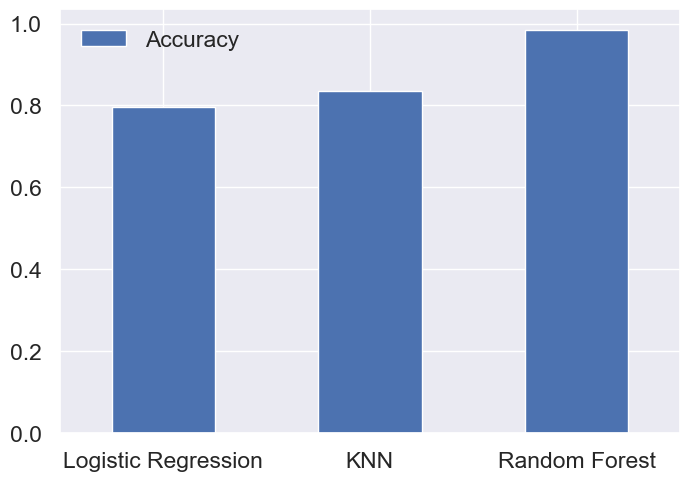

In [322]:
model_compare = pd.DataFrame(model_scores,
                             index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Now we've got a baseline model.. and we know a model's first prediction aren't always what we should based our next setp off. what should we do?

Let's look at the following:
* HyperParameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* F1 score

## Hyperparameter Tuning 

Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters
are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.

### 1. KNN

The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems.

In [323]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop thorugh different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))


In [324]:
knn.set_params(n_neighbors = np.argmax(test_scores)+1 )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Maximum KNN score on the test data: 98.54%


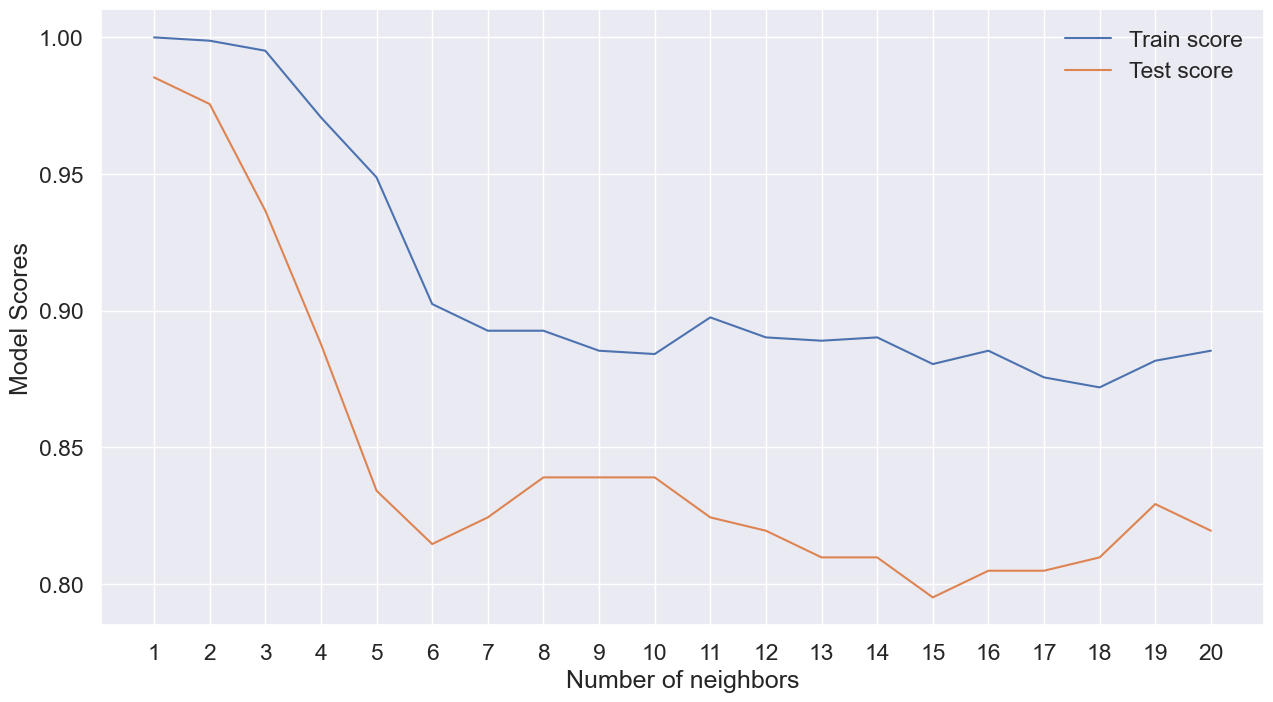

In [325]:
plt.figure(figsize=(15, 8))
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Scores")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%");

## Hyperparameter tuning with Randomized SearchCV

We're going to tune:

2. LogisticRegression()
3. RandomForestCLassfier()

...Using RandomizedSearchCV since it is faster compared to GridSearchCV.


## 2. Logistic Regression

Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. 

## 3. Random Forest

Random forests Trees is a collaborative team of decision trees that work together to provide a single output

In [326]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Create hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10,100,50),
          "max_depth":[None,3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now We've got the hyperparameters grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [327]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit Random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [328]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 2807.2162039411755}

In [329]:
rs_log_reg.score(X_test,y_test)

0.7951219512195122

Now as we've tuned logisticRegression(), Lets do same with RandomForestClassfiers()

In [330]:
# Setup Random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=100,
                           verbose=True)

# Fit the random Hyperprameter search mode for randomforestclassifier()
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [331]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [332]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test,y_test)

0.975609756097561

## Evaluating our tuned machine learning classifier, beyond accuracy.

* Confusion Matrix
* Classification report
* Precision
* Recall
* F1-Score

...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [333]:
y_preds = knn.predict(X_test)

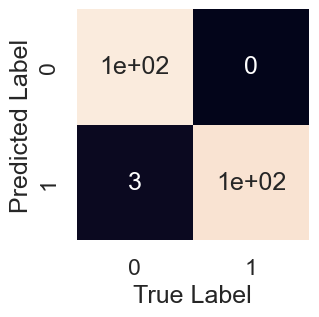

In [334]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """ 
    Plot a nice looking confusion matrix using seaborn's heatmap(
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test,y_preds)

In [335]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Calculate evaluation metrics using CrossValidation

Modelling our best model with its best parameter

In [336]:
# Cross-validated accuaracy
cv_acc = cross_val_score(knn,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)

In [337]:
# Cross-validated precision
cv_precision = cross_val_score(knn,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
cv_precision = np.mean(cv_precision)

In [338]:
# Cross-validated recall
cv_recall = cross_val_score(knn,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
cv_recall = np.mean(cv_recall)

In [339]:
# Cross-validated f1-score
cv_f1 = cross_val_score(knn,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)

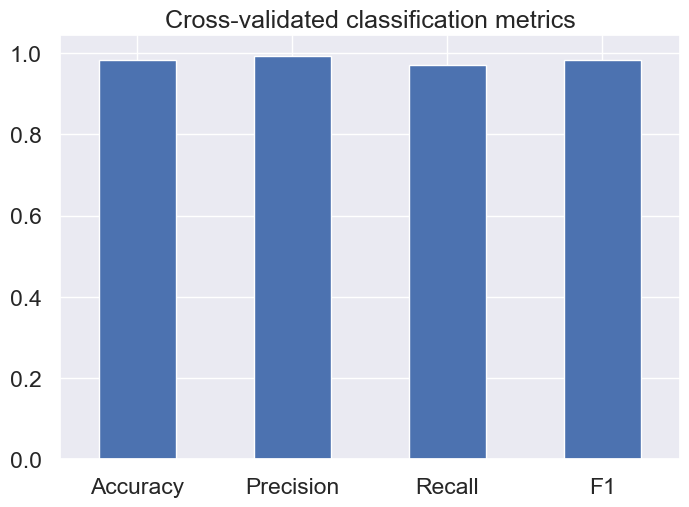

In [340]:
# Visuzalize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)
plt.xticks(rotation=0);


### Feature Importance

Feature Importance is another as asking, "which feature contributed" most to the outcomes of the model and how did they contributed<br>
Finding Feature imp. is different for each machine learning model<br>
Let's Find the feature importance for our LogisticRegression Model (Because knn do not have feature importance and it is our second best performing model)<br>

In [341]:
# Fit an instance of LogisticRegression

clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')
clf.fit(X_train,y_train);

In [342]:
# Check Coef_
clf.coef_

array([[-0.02804057, -0.7582299 ,  0.81995224, -0.2878802 , -0.39242627,
        -0.05166252,  0.132902  ,  0.59462252, -0.41030036, -0.70969781,
         0.32732507, -0.78450042, -0.61866499]])

In [343]:
# Match pearson's coefficient of features to coloumns

feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': -0.02804056775725353,
 'sex': -0.7582298959063809,
 'cp': 0.8199522433704631,
 'trestbps': -0.2878802007664427,
 'chol': -0.3924262743547425,
 'fbs': -0.05166252158781624,
 'restecg': 0.1329020037044331,
 'thalach': 0.5946225238370315,
 'exang': -0.41030036421596167,
 'oldpeak': -0.7096978131428711,
 'slope': 0.32732507374660147,
 'ca': -0.7845004209027502,
 'thal': -0.6186649893680725}

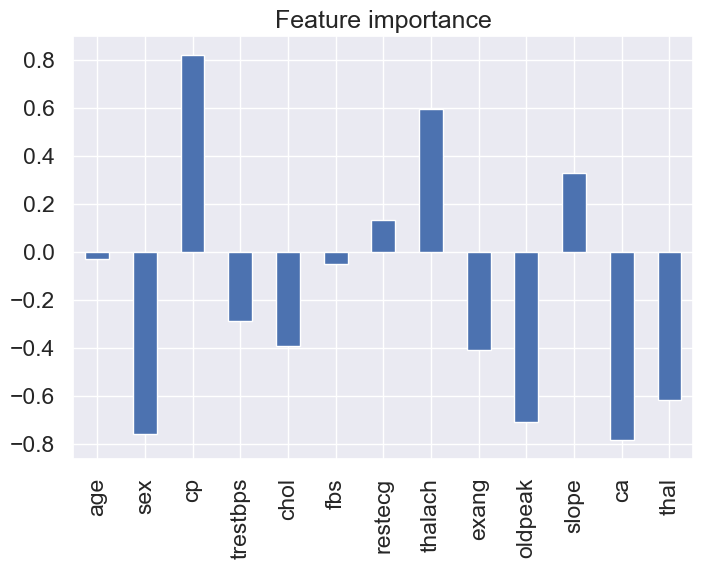

In [344]:
# Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);

In [345]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,86,226
1,413,300


#### Saving the model so that it can be exported for external use

In [346]:
# Save the model
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(knn, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!


## Code Testing on Exported Models for Evaluation

In [347]:
model_filename = r"C:\Users\HP\Desktop\Project (Final Year)\HDP 2\model.pkl"

with open(model_filename, 'rb') as file:
    model = pickle.load(file)

user_input = pd.DataFrame(data={
            'age': [53],
            'sex': [1],  
            'cp': [0],
            'trestbps': [140],
            'chol': [203],
            'fbs': [1],
            'restecg': [0],
            'thalach': [155],
            'exang': [1],
            'oldpeak': [3.1],
            'slope': [0],
            'ca': [0],
            'thal': [3]
        })

prediction = model.predict(scaler.transform(user_input))
# prediction_proba = model.predict_proba(user_input)
prediction_proba = model.predict_proba(scaler.transform(user_input))  # Activate this with standard scaler
print(prediction)

if (prediction[0]== 0):
  print('The person is healthy', prediction_proba)
else:
  print('The person is not healthy, they need a checkup', prediction_proba)

[0]
The person is healthy [[1. 0.]]


In [348]:
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3) # Sample test case

#changing the data into a numpy array

changed_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = changed_data_as_numpy_array.reshape(1, -1)

prediction = knn.predict(scaler.transform(input_data_reshaped))  # Activate this with standard scaler
prediction_proba =knn.predict_proba(scaler.transform(input_data_reshaped))
# prediction = knn.predict(input_data_reshaped) 
print(prediction, prediction_proba)

[0] [[1. 0.]]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [349]:
pred_x = pd.DataFrame(np.array([52,1,0,125,212,0,1,168,0,1,2,2,3]).reshape(1,-1), 
                     columns = ['age','sex','cp','trestbps','chol','fbs',
                               'restecg','thalach','exang','oldpeak','slope',
                               'ca','thal'])
knn.predict(scaler.transform(pred_x))

array([0], dtype=int64)

# Extensive Data Processing and Ensembling

> This part includes comparision of 7 different models that are being deployed and being tested on the cross validated dataset for a common comparision output on:
  > 1. Accuracy Train
  > 2. Accuracy Test
  > 3. Best Score

We will also see about how does the models perform on the UCI Dataset on parameters like:

**1. Confusion Matrix:**
A confusion matrix is a table that summarizes the performance of a classification model.
It shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.
Useful for evaluating model accuracy, precision, recall, and F1-score.

**2. ROC AUC Curve (Receiver Operating Characteristic, Area Under the Curve):**
A graphical representation of a binary classification model’s performance.
Plots the true positive rate (TPR) against the false positive rate (FPR) at various thresholds.
The area under the ROC curve (AUC) quantifies overall model performance.

**3. Learning Rate:**
A hyperparameter in optimization algorithms (e.g., gradient descent).
Determines the step size for updating model parameters during training.
Too high can cause overshooting; too low can slow convergence.

**4. Precision-Recall Curve:**
Evaluates a model’s precision and recall trade-off across different thresholds.
Precision: TP / (TP + FP) measures how many predicted positives are actually positive.
Recall (sensitivity): TP / (TP + FN) measures how many actual positives are correctly predicted.

In [350]:
Df = pd.read_csv("heart.csv")

# Split data into X and y
X = Df.drop("target",axis=1)
y = Df["target"]
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, 
                                                 y, 
                                                 test_size=0.2)

## Putting all representation under same funtion for easy execution 

> **Train Accuracy Score (acc_score_train):**

- This score represents the accuracy of the model on the training dataset.
- It is calculated using the accuracy_score function from scikit-learn and is expressed as a percentage.
- It provides an indication of how well the model has learned from the training data.

> **Test Accuracy Score (acc_score_test):**

- This score represents the accuracy of the model on the test dataset.
- Similar to the train accuracy score, it is calculated using the accuracy_score function and is expressed as a percentage.
- It indicates how well the model generalizes to new, unseen data.

> **Best Score (best_score):**

- This score represents the best cross-validation score achieved by the model during the grid search process.
- It is derived from the best_score_ attribute of the GridSearchCV object.
- The score is rounded to four decimal places and represents the model's performance based on the chosen evaluation metric during cross-validation.

In [351]:
def fit_ml_models(algo, algo_param, algo_name):
    # --- Algorithm Pipeline ---
    algo = Pipeline([('algo', algo)])
    
    # --- Apply Grid Search ---
    model = GridSearchCV(algo, param_grid=algo_param, cv=10, n_jobs=-1, verbose=1)
    
    # --- Fitting Model ---
    print(f"::: Fitting {algo_name} :::")
    fit_model = model.fit(x_train_process, y_train)
    
    # --- Model Best Parameters ---
    best_params = model.best_params_
    print(f"\n>> Best Parameters: {best_params}")
    
    # --- Best & Final Estimators ---
    best_model = model.best_estimator_
    best_estimator = model.best_estimator_._final_estimator
    best_score = round(model.best_score_, 4)
    print(f">> Best Score: {best_score:.3f}")
    
    # --- Create Prediction for Train & Test ---
    y_pred_train = model.predict(x_train_process)
    y_pred_test = model.predict(x_test_process)
    
    # --- Train & Test Accuracy Score ---
    acc_score_train = round(accuracy_score(y_pred_train, y_train)*100, 3)
    acc_score_test = round(accuracy_score(y_pred_test, y_test)*100, 3)
    print(f"\n::: Train and Test Accuracy Score for {algo_name} :::")
    print(f"\t>> Train Accuracy: {acc_score_train:.2f}%")
    print(f"\t>> Test Accuracy: {acc_score_test:.2f}%")
    
    # --- Classification Report ---
    print(f"\n::: Classification Report for {algo_name} :::")
    print(classification_report(y_test, y_pred_test))
    
    # --- Plot Settings ---
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 14))
    
    # --- Confusion Matrix ---
    conf_matrix = ConfusionMatrix(best_estimator, ax=ax1, cmap='Reds')
    conf_matrix.fit(x_train_process, y_train)
    conf_matrix.score(x_test_process, y_test)
    conf_matrix.finalize()
    conf_matrix.ax.set_title('Confusion Matrix\n')
    
    # --- ROC AUC ---
    rocauc = ROCAUC(best_estimator, classes=['False', 'True'], ax=ax2)
    rocauc.fit(x_train_process, y_train)
    rocauc.score(x_test_process, y_test)
    rocauc.finalize()
    rocauc.ax.set_title('ROC AUC Curve\n')
    
    # --- Learning Curve ---
    lcurve = LearningCurve(best_estimator, scoring='f1_weighted', ax=ax3)
    lcurve.fit(x_train_process, y_train)
    lcurve.finalize()
    lcurve.ax.set_title('Learning Curve\n')
    
    # --- Feature Importance or Precision Recall Curve ---
    try:
        feat_importance = FeatureImportances(best_estimator, labels=columns_list_onehot, ax=ax4, topn=5)
        feat_importance.fit(x_train_process, y_train)
        feat_importance.finalize()
        feat_importance.ax.set_title('Feature Importances (Top 5 Features)\n')
    except:
        prec_curve = PrecisionRecallCurve(best_estimator, ax=ax4, ap_score=True, iso_f1_curves=True)
        prec_curve.fit(x_train_process, y_train)
        prec_curve.score(x_test_process, y_test)
        prec_curve.finalize()
        prec_curve.ax.set_title('Precision-Recall Curve\n')
        
    plt.suptitle(f'\n{algo_name} Performance Evaluation Report\n')
    plt.tight_layout()
    
    return acc_score_train, acc_score_test, best_score

In [352]:
# # (This Code is here to rectify issues (if caused) due to Standard Scaler)

# # Ensure X_train and X_test are pandas DataFrames 
# if not isinstance(X_train, pd.DataFrame):
#     X_train = pd.DataFrame(X_train, columns=[
#         'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
#         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
#         'ca', 'thal'])
# if not isinstance(X_test, pd.DataFrame):
#     X_test = pd.DataFrame(X_test, columns=[
#         'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
#         'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 
#         'ca', 'thal'])

# # --- Numerical Pipeline ---
# num_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# num_pipeline = Pipeline([
#   ('scaling', StandardScaler())
# ])

# # --- Categorical Pipeline ---
# cat_column = ['cp', 'slope', 'thal']
# cat_pipeline = Pipeline([
#   ('onehot', OneHotEncoder(drop='first', sparse=False))
# ])

# # --- Combine Both Pipelines into Transformer ---
# preprocessor = ColumnTransformer([
#   ('categorical', cat_pipeline, cat_column),
#   ('numerical', num_pipeline, num_column)],
#   remainder='passthrough'
# )

# # --- Apply Transformer to Pipeline ---
# process_pipeline = Pipeline([
#   ('preprocessor', preprocessor)
# ])

# # --- Apply to Dataframe --- 
# x_train_process = process_pipeline.fit_transform(X_train)
# x_test_process = process_pipeline.transform(X_test)


In [353]:
# --- Numerical Pipeline ---
num_column = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_pipeline = Pipeline([
    ('scaling', RobustScaler())
])

# --- Categorical Pipeline ---
cat_column = ['cp', 'slope', 'thal']
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

# --- Combine Both Pipelines into Transformer ---
preprocessor = ColumnTransformer([
    ('categorical', cat_pipeline, cat_column)
    , ('numerical', num_pipeline, num_column)]
    , remainder='passthrough')

# --- Apply Transformer to Pipeline ---
process_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# --- Apply to Dataframe --- 
x_train_process = process_pipeline.fit_transform(X_train)
x_test_process = process_pipeline.fit_transform(X_test)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### K-Nearest Neighbour

::: Fitting K-Nearest Neighbour (KNN) :::
Fitting 10 folds for each of 16 candidates, totalling 160 fits

>> Best Parameters: {'algo__leaf_size': 1, 'algo__n_neighbors': 2}
>> Best Score: 0.950

::: Train and Test Accuracy Score for K-Nearest Neighbour (KNN) :::
	>> Train Accuracy: 99.76%
	>> Test Accuracy: 97.56%

::: Classification Report for K-Nearest Neighbour (KNN) :::
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       102
           1       1.00      0.95      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



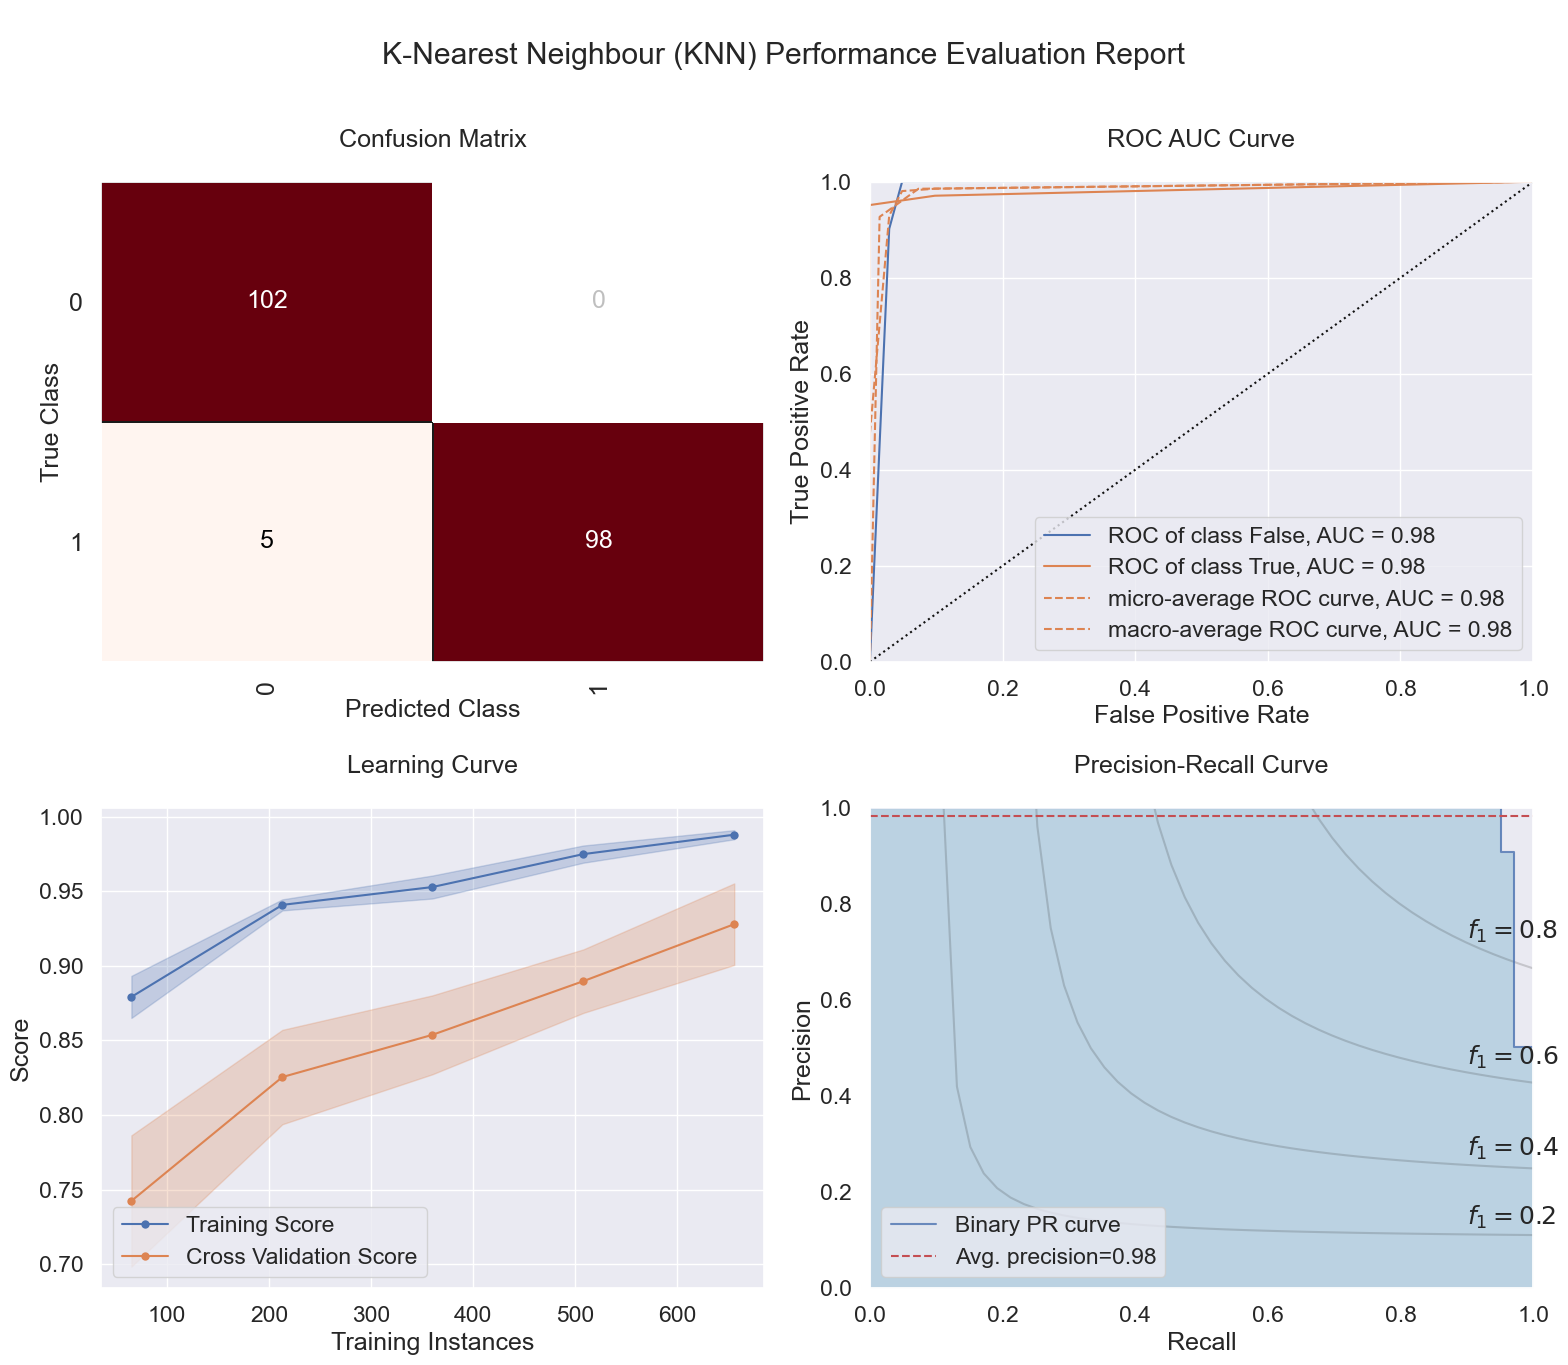

In [354]:
# --- KNN Parameters ---
parameter_knn = {"algo__n_neighbors": [2, 5, 10, 17]
                , "algo__leaf_size": [1, 10, 11, 30]}

# --- KNN Algorithm ---
algo_knn = KNeighborsClassifier(n_jobs=-1)

# --- Applying KNN ---
acc_score_train_knn, acc_score_test_knn, best_score_knn = fit_ml_models(algo_knn, parameter_knn, "K-Nearest Neighbour (KNN)")

### Logistic Regression

::: Fitting Logistic Regression :::
Fitting 10 folds for each of 12 candidates, totalling 120 fits

>> Best Parameters: {'algo__C': 0.5, 'algo__solver': 'lbfgs'}
>> Best Score: 0.871

::: Train and Test Accuracy Score for Logistic Regression :::
	>> Train Accuracy: 88.29%
	>> Test Accuracy: 82.44%

::: Classification Report for Logistic Regression :::
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       102
           1       0.78      0.91      0.84       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



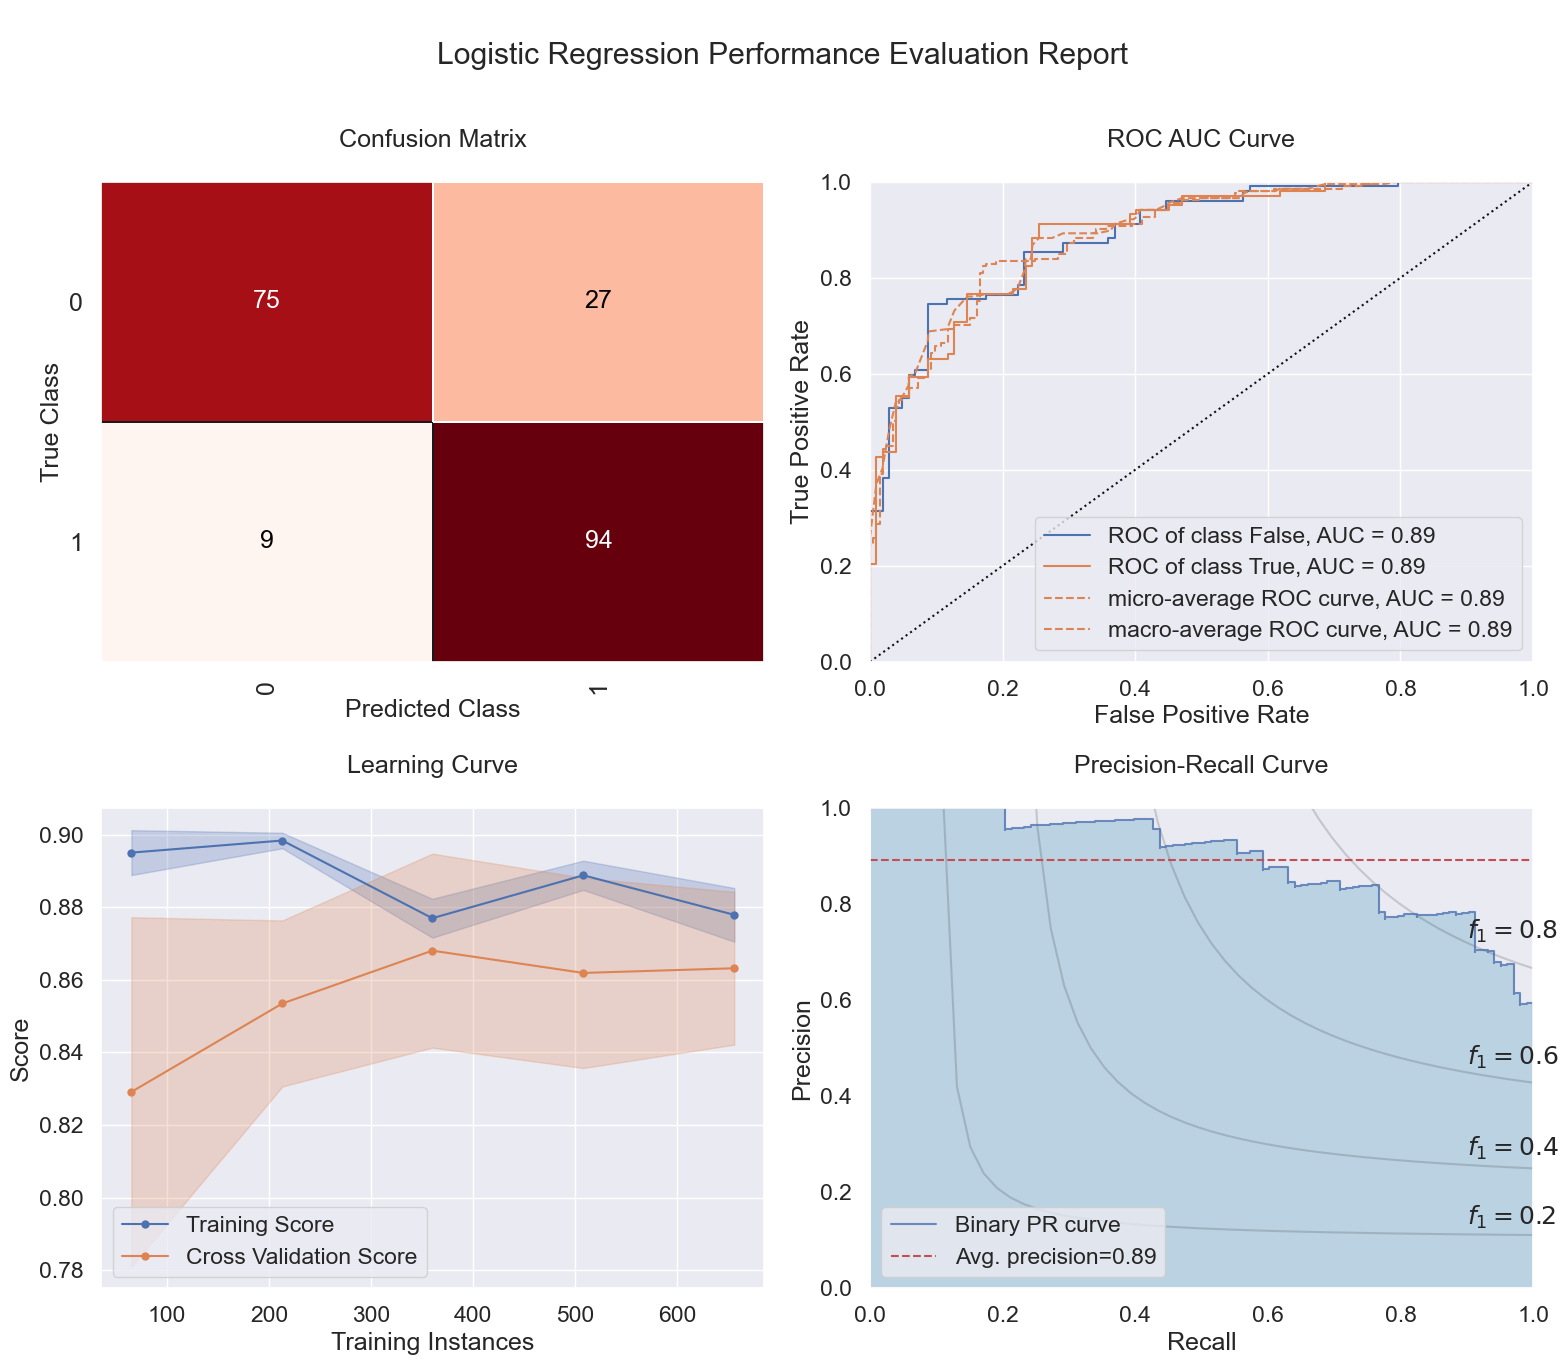

In [355]:
# --- Logistic Regression Parameters ---
parameter_lr = {"algo__solver": ["lbfgs", "saga", "newton-cg"]
                , "algo__C": [0.1, 0.2, 0.5, 0.8]}

# --- Logistic Regression Algorithm ---
algo_lr = LogisticRegression(penalty="l2", random_state=42, n_jobs=-1)

# --- Applying Logistic Regression ---
acc_score_train_lr, acc_score_test_lr, best_score_lr = fit_ml_models(algo_lr, parameter_lr, "Logistic Regression")

### Support Vector Machine

::: Fitting Support Vector Machine (SVM) :::
Fitting 10 folds for each of 171 candidates, totalling 1710 fits

>> Best Parameters: {'algo__C': 0.8, 'algo__gamma': 0.8, 'algo__kernel': 'rbf'}
>> Best Score: 0.985

::: Train and Test Accuracy Score for Support Vector Machine (SVM) :::
	>> Train Accuracy: 100.00%
	>> Test Accuracy: 98.54%

::: Classification Report for Support Vector Machine (SVM) :::
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



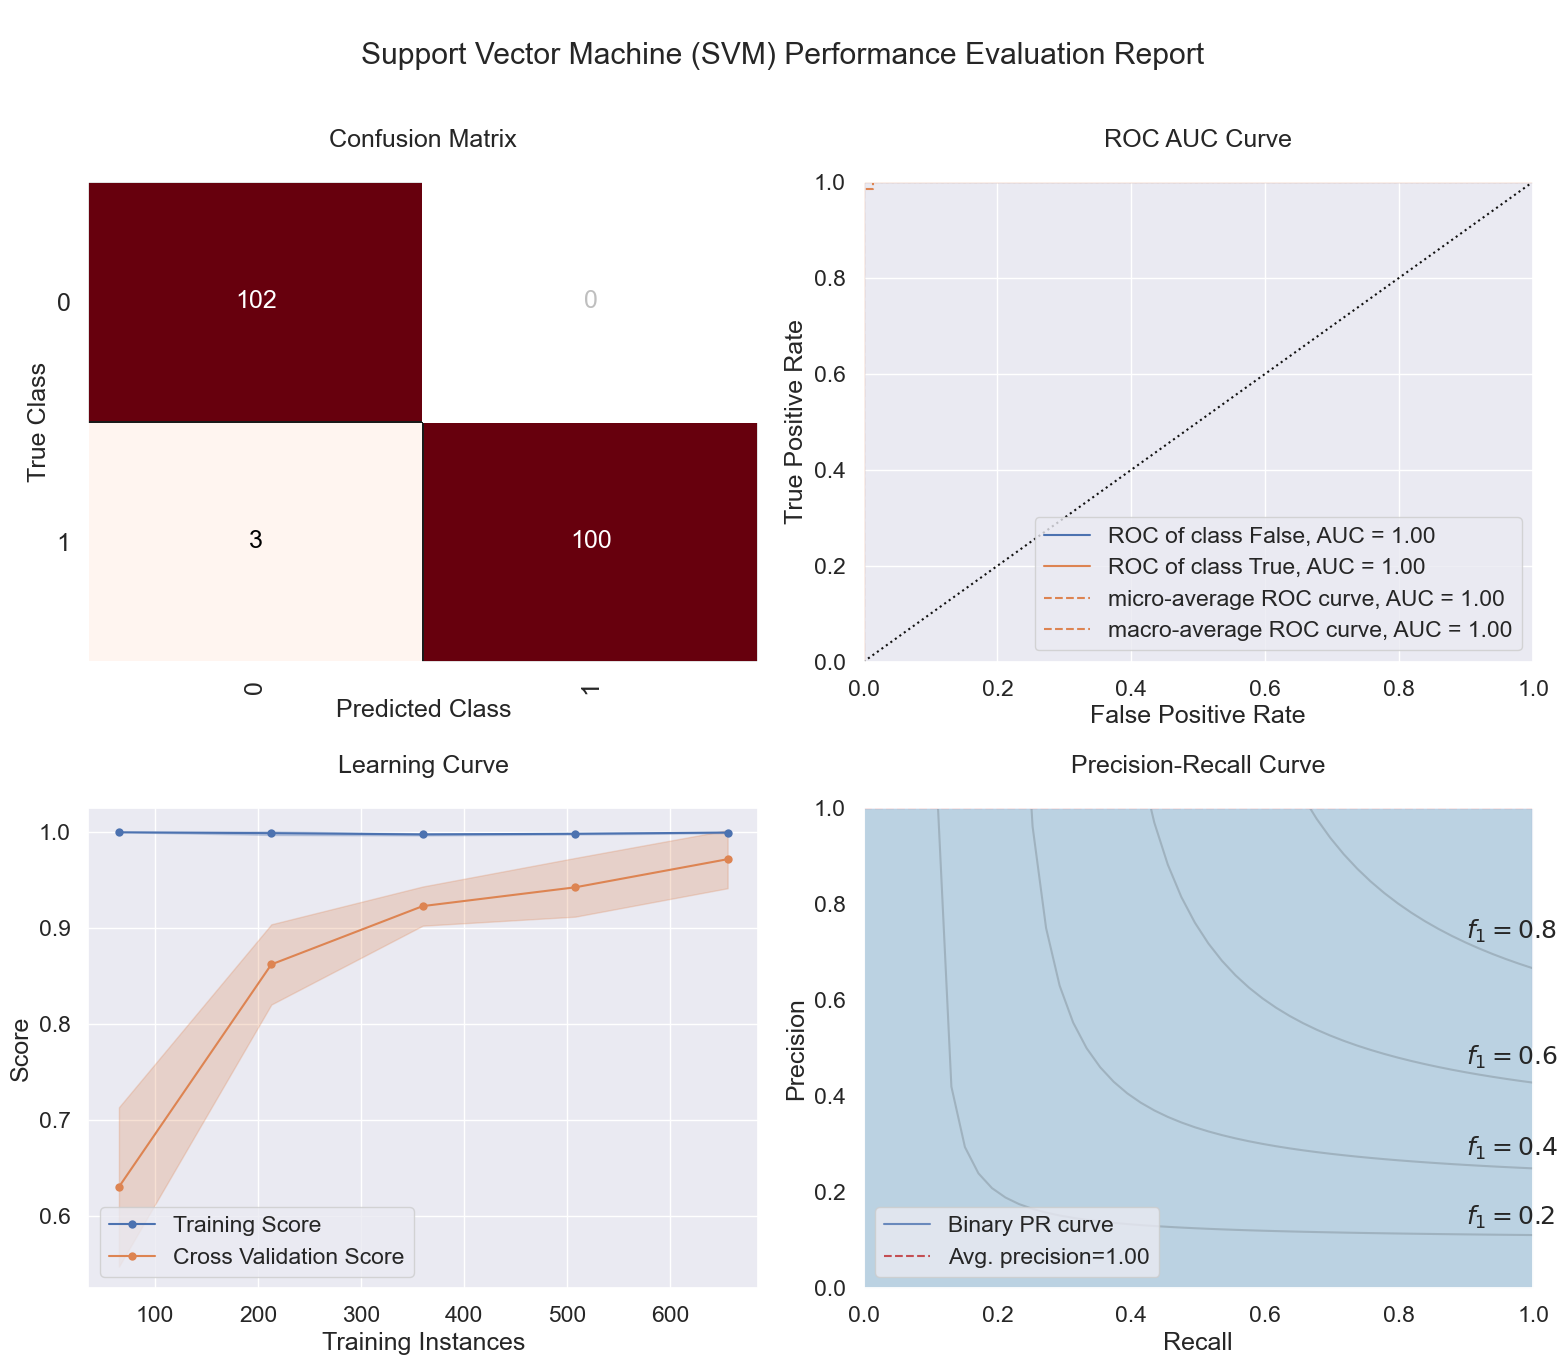

In [356]:
# --- SVM Parameters ---
parameter_svc = [
    {'algo__kernel': ['rbf'], 'algo__gamma': np.arange(0.1, 1, 0.1), 'algo__C': np.arange(0.1, 1, 0.1)}
    , {'algo__kernel': ['linear'], 'algo__C': np.arange(0.1, 1, 0.1)}
    , {'algo__kernel': ['poly'], 'algo__degree' : np.arange(1, 10, 1), 'algo__C': np.arange(0.1, 1, 0.1)}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- Applying SVM ---
acc_score_train_svc, acc_score_test_svc, best_score_svc = fit_ml_models(algo_svc, parameter_svc, "Support Vector Machine (SVM)")

### Gaussian Naive Bayes

::: Fitting Gaussian Naive Bayes :::
Fitting 10 folds for each of 4 candidates, totalling 40 fits

>> Best Parameters: {'algo__var_smoothing': 0.01}
>> Best Score: 0.855

::: Train and Test Accuracy Score for Gaussian Naive Bayes :::
	>> Train Accuracy: 86.46%
	>> Test Accuracy: 80.49%

::: Classification Report for Gaussian Naive Bayes :::
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       102
           1       0.78      0.84      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



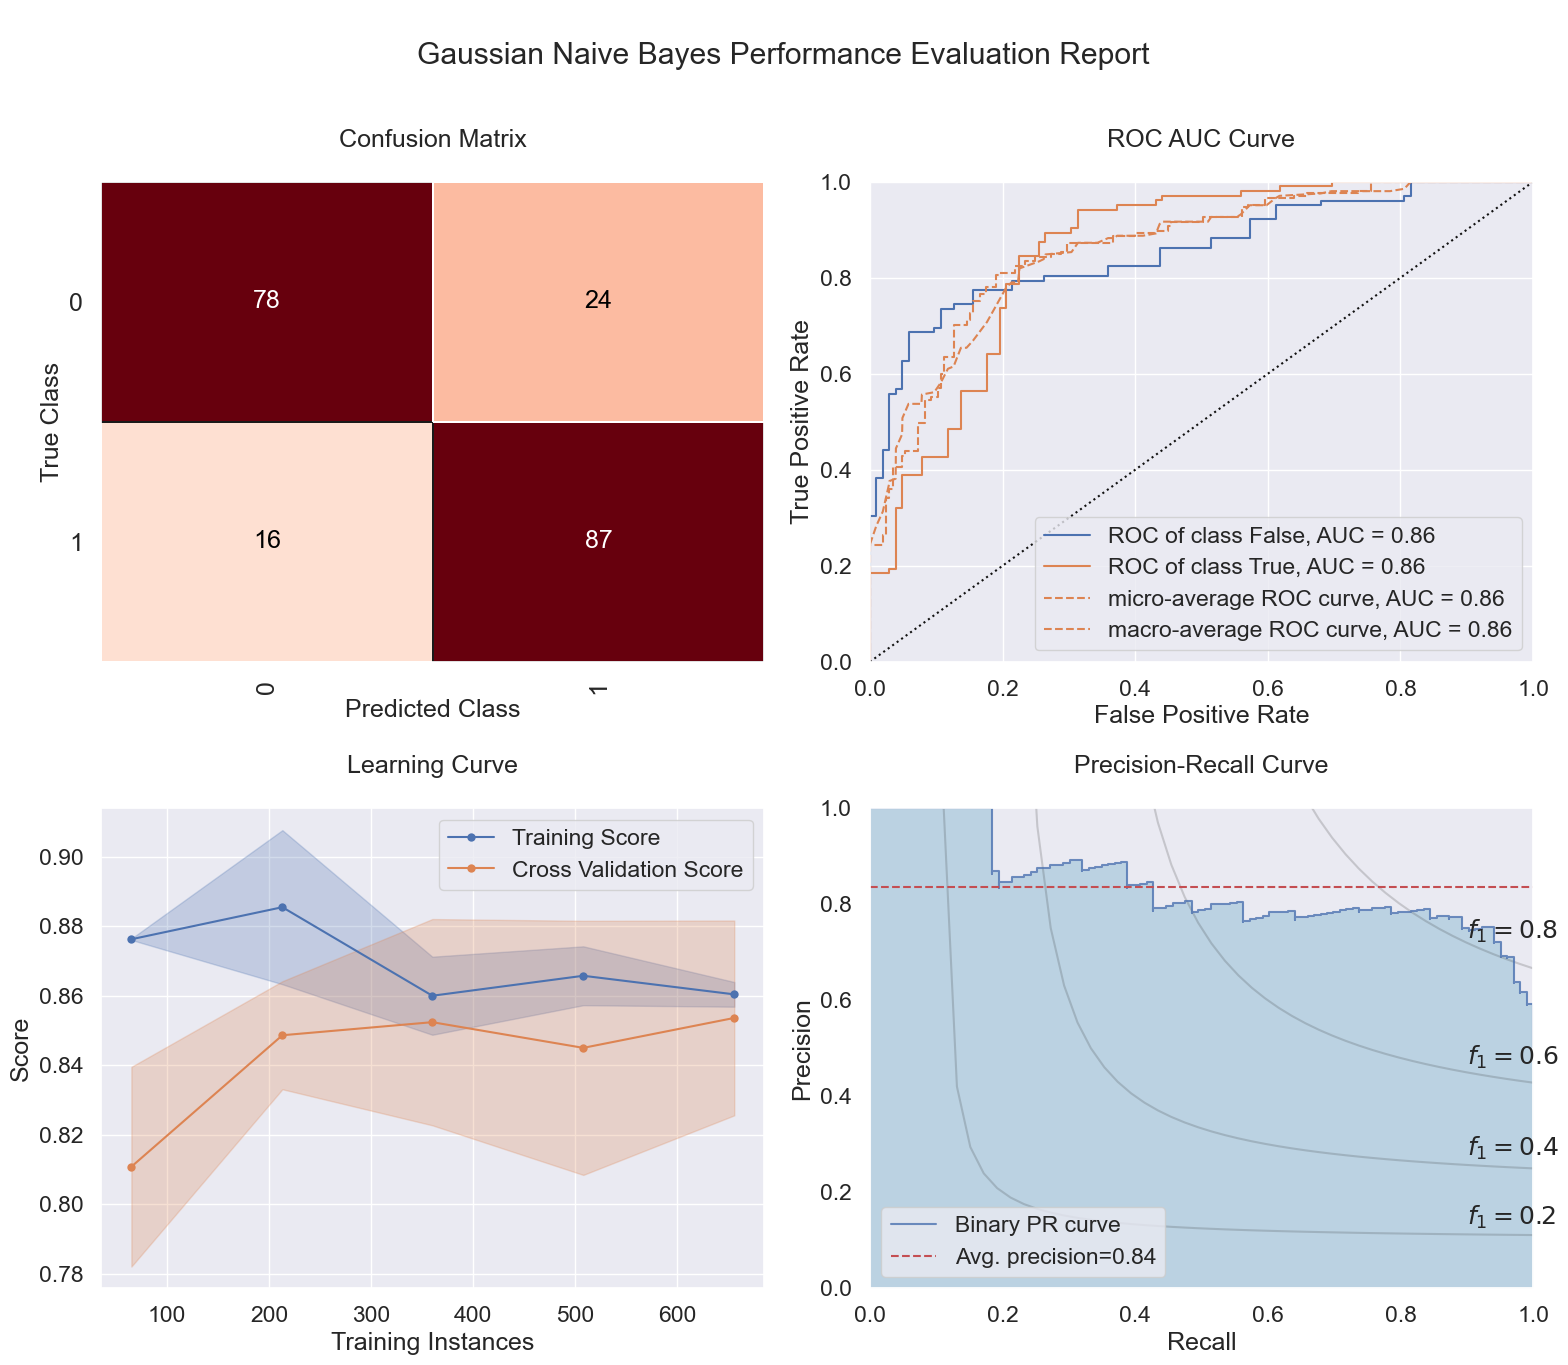

In [357]:
# --- Gaussian NB Parameters ---
parameter_gnb = {"algo__var_smoothing": [1e-2, 1e-3, 1e-4, 1e-6]}

# --- Gaussian NB Algorithm ---
algo_gnb = GaussianNB()

# --- Applying Gaussian NB ---
acc_score_train_gnb, acc_score_test_gnb, best_score_gnb = fit_ml_models(algo_gnb, parameter_gnb, "Gaussian Naive Bayes")

### Decision Tree Classification

::: Fitting Decision Tree :::
Fitting 10 folds for each of 3 candidates, totalling 30 fits

>> Best Parameters: {'algo__max_depth': 3}
>> Best Score: 0.845

::: Train and Test Accuracy Score for Decision Tree :::
	>> Train Accuracy: 86.10%
	>> Test Accuracy: 81.46%

::: Classification Report for Decision Tree :::
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       102
           1       0.84      0.79      0.81       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



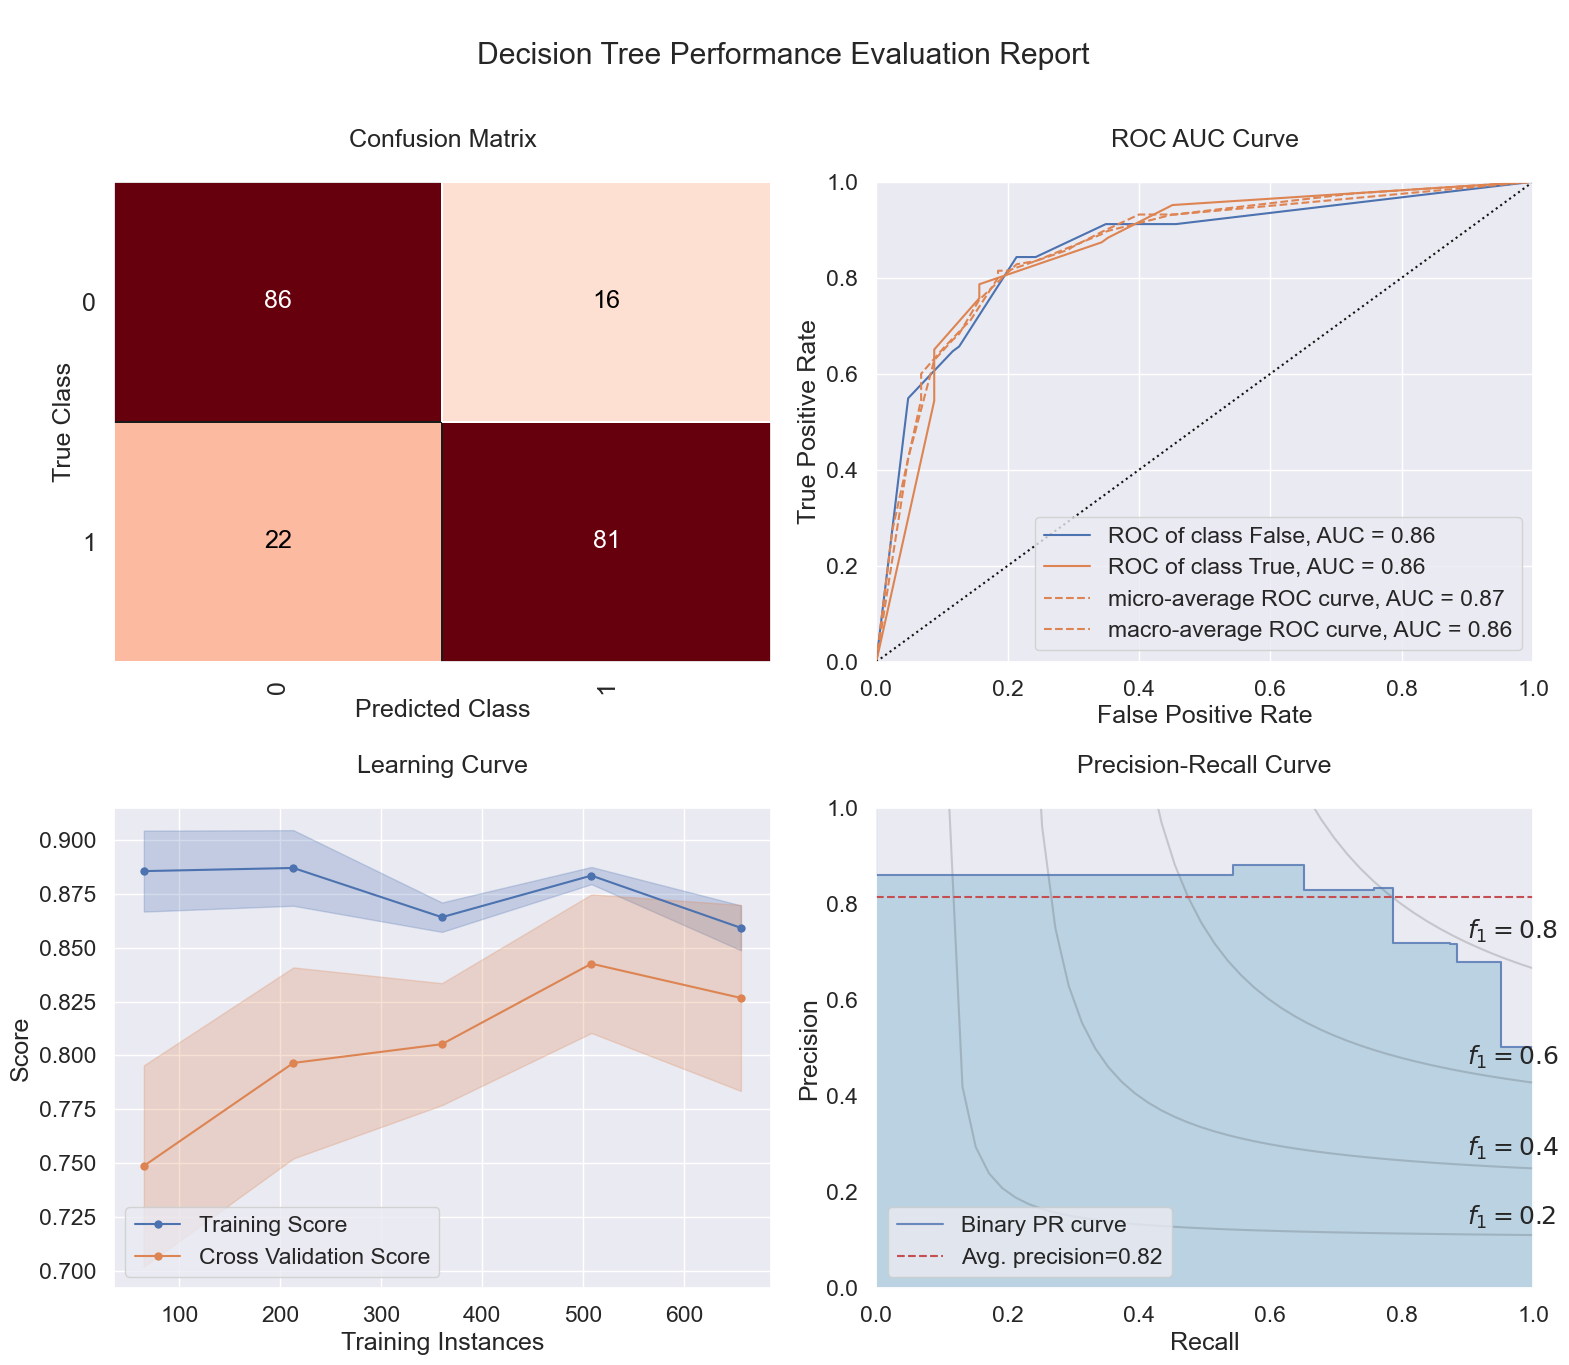

In [358]:
# --- Decision Tree Parameters ---
parameter_dt = {"algo__max_depth": [1, 2, 3]}

# --- Decision Tree Algorithm ---
algo_dt = DecisionTreeClassifier(random_state=42)

# --- Applying Decision Tree ---
acc_score_train_dt, acc_score_test_dt, best_score_dt = fit_ml_models(algo_dt, parameter_dt, "Decision Tree")

### Random Forest

::: Fitting Random Forest :::
Fitting 10 folds for each of 5 candidates, totalling 50 fits

>> Best Parameters: {'algo__max_depth': 5}
>> Best Score: 0.913

::: Train and Test Accuracy Score for Random Forest :::
	>> Train Accuracy: 94.76%
	>> Test Accuracy: 84.88%

::: Classification Report for Random Forest :::
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       102
           1       0.82      0.90      0.86       103

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



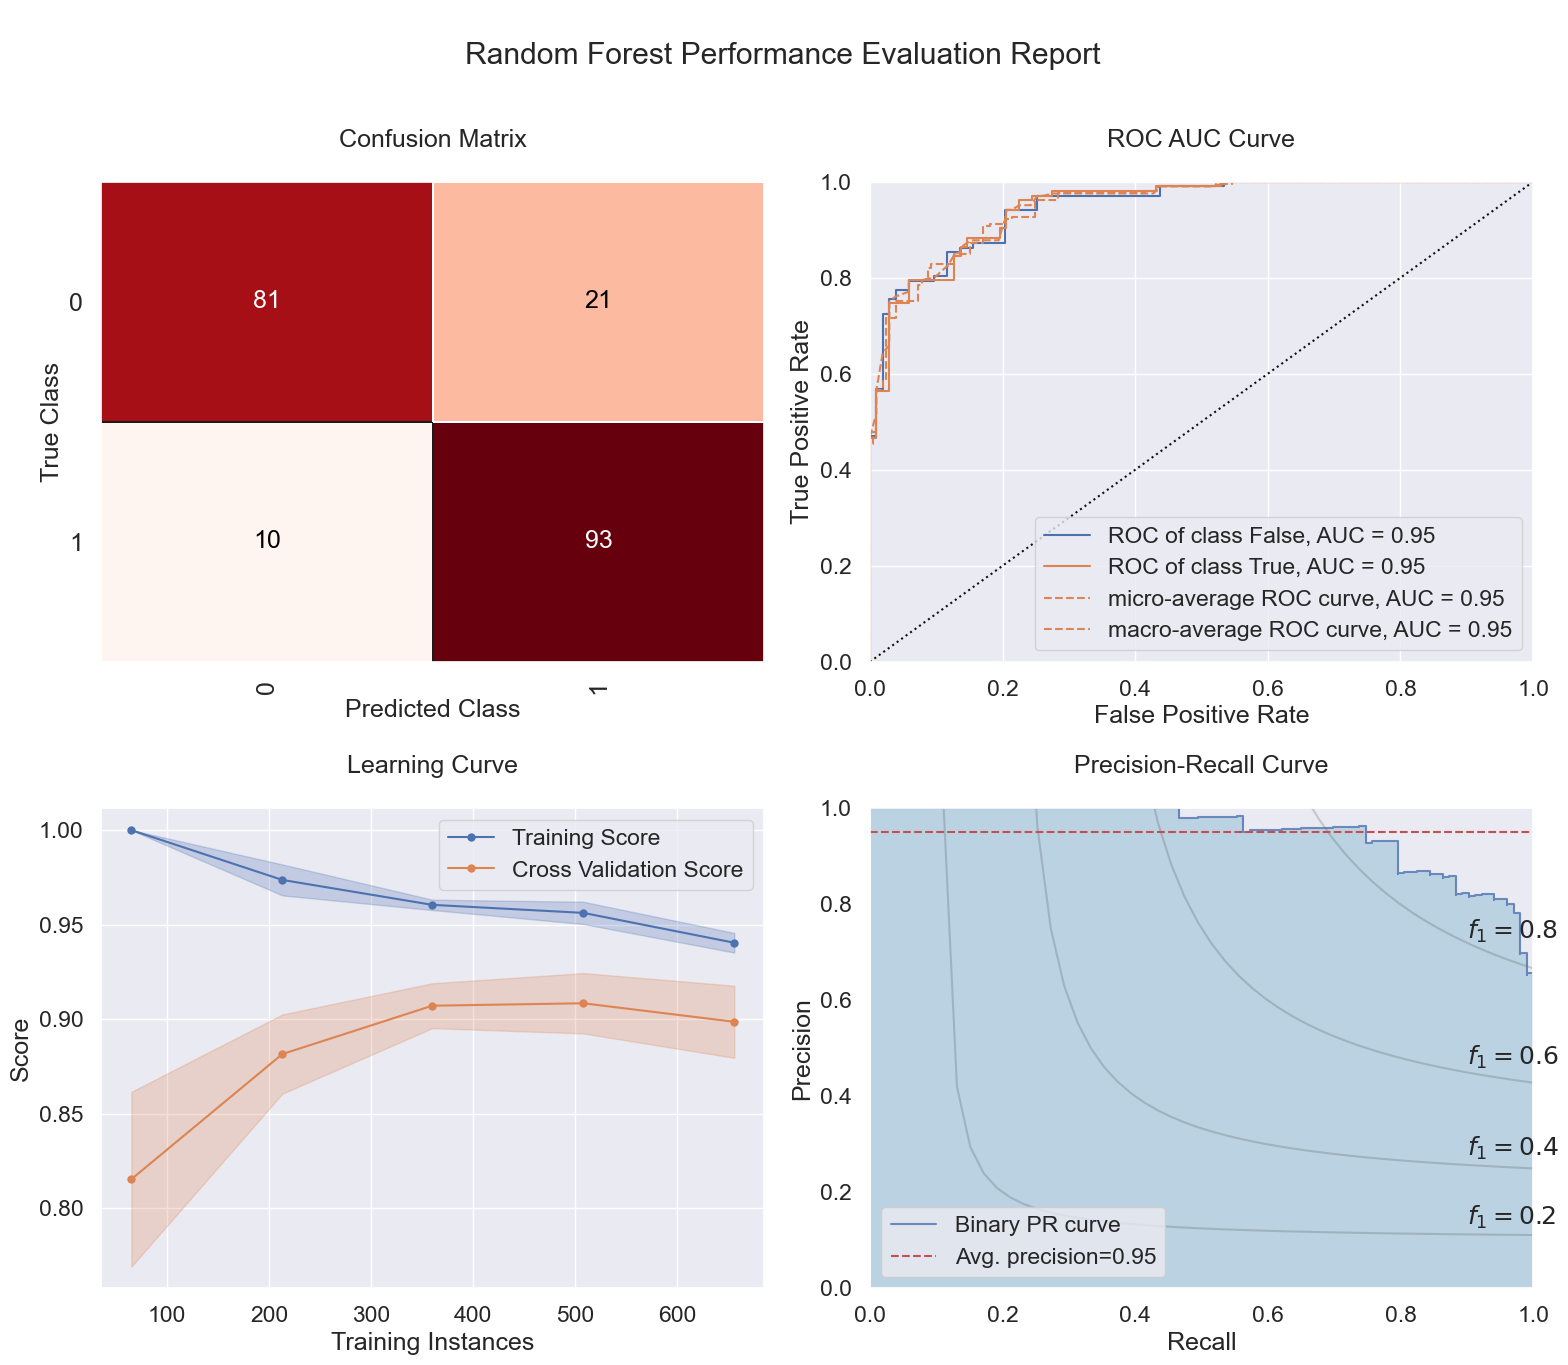

In [359]:
# --- Random Forest Parameters ---
parameter_rf = {"algo__max_depth": np.arange(1, 6, 1)}

# --- Random Forest Algorithm ---
algo_rf = RandomForestClassifier(random_state=99, n_jobs=-1)

# --- Applying Random Forest ---
acc_score_train_rf, acc_score_test_rf, best_score_rf = fit_ml_models(algo_rf, parameter_rf, "Random Forest")

### Gradient Boosting

::: Fitting Gradient Boosting :::
Fitting 10 folds for each of 27 candidates, totalling 270 fits

>> Best Parameters: {'algo__learning_rate': 0.5, 'algo__min_weight_fraction_leaf': 0.1, 'algo__n_estimators': 6}
>> Best Score: 0.849

::: Train and Test Accuracy Score for Gradient Boosting :::
	>> Train Accuracy: 88.90%
	>> Test Accuracy: 83.42%

::: Classification Report for Gradient Boosting :::
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       102
           1       0.82      0.86      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



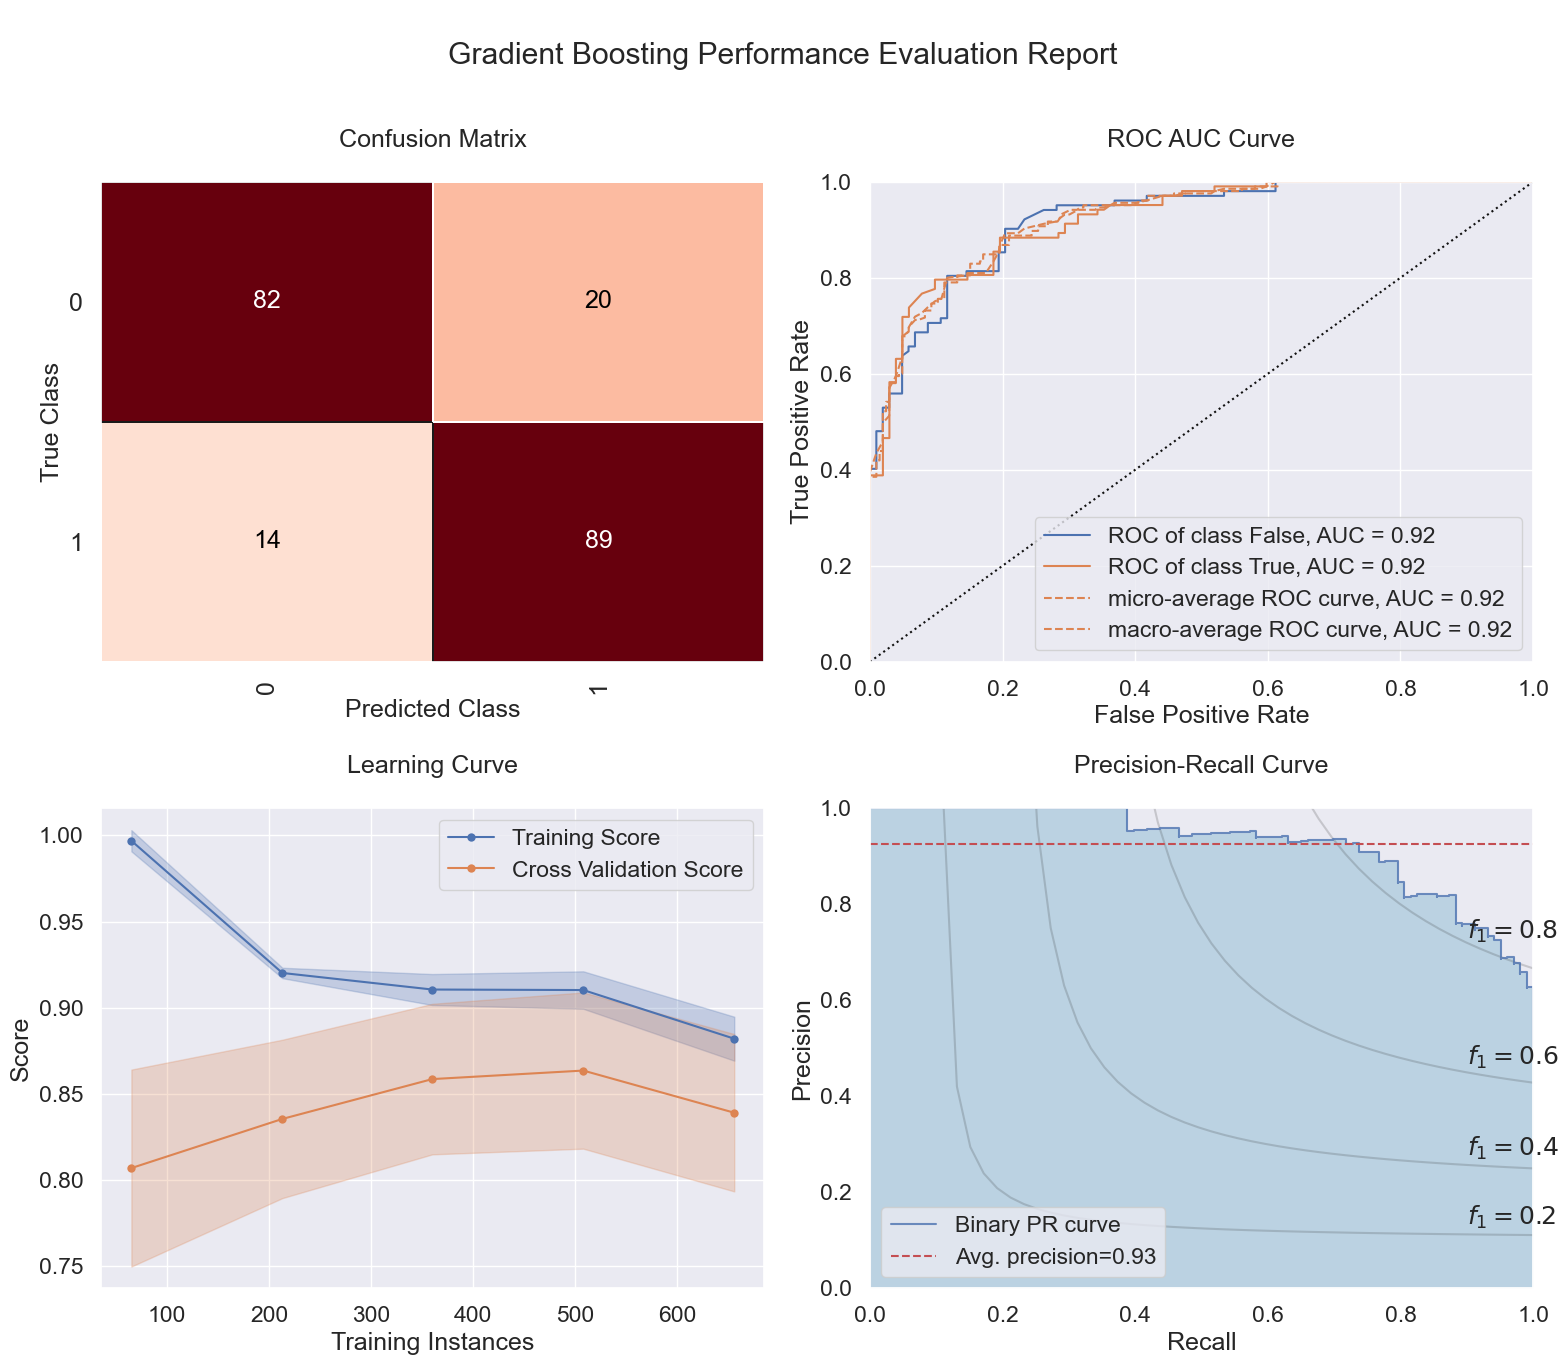

In [360]:
# --- Gradient Boosting Parameters ---
parameter_gb = {
    "algo__learning_rate": [0.1, 0.3, 0.5]
    , "algo__n_estimators": [2, 4, 6]
    , "algo__min_weight_fraction_leaf": [0.1, 0.2, 0.5]
}

# --- Gradient Boosting Algorithm ---
algo_gb = GradientBoostingClassifier(loss="exponential", random_state=2)

# --- Applying Gradient Boosting ---
acc_score_train_gb, acc_score_test_gb, best_score_gb = fit_ml_models(algo_gb, parameter_gb, "Gradient Boosting")

## All 7 Model Comparision on Accuracy Train, Accuracy Test and Best score

In [361]:
# --- Create Accuracy Comparison Table ---
df_compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 'Gaussian NB',
              'Decision Tree', 'Random Forest', 'Gradient Boosting'], 
    'Accuracy Train': [acc_score_train_lr, acc_score_train_knn, acc_score_train_svc, acc_score_train_gnb,
                       acc_score_train_dt, acc_score_train_rf, acc_score_train_gb],
    'Accuracy Test': [acc_score_test_lr, acc_score_test_knn, acc_score_test_svc, acc_score_test_gnb,
                      acc_score_test_dt, acc_score_test_rf, acc_score_test_gb],
    'Best Score': [best_score_lr, best_score_knn, best_score_svc, best_score_gnb, best_score_dt, best_score_rf, 
                   best_score_gb]
})

# --- Create Comparison Table ---
print("::: Models Comparison :::")
print('*' * 26)
print(df_compare.sort_values(by='Best Score', ascending=False).to_string(index=False))

::: Models Comparison :::
**************************
                 Model  Accuracy Train  Accuracy Test  Best Score
Support Vector Machine         100.000         98.537      0.9854
   K-Nearest Neighbour          99.756         97.561      0.9500
         Random Forest          94.756         84.878      0.9134
   Logistic Regression          88.293         82.439      0.8707
           Gaussian NB          86.463         80.488      0.8549
     Gradient Boosting          88.902         83.415      0.8488
         Decision Tree          86.098         81.463      0.8451


In [362]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator to predict and calculate accuracy
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy*100}'%''")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.530 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.530 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.530 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

In [363]:
# # Assuming you have a dataset in variables X and y
# # Split data with a fixed random state
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing: scaling the features
# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train)
# # X_test = scaler.transform(X_test)

# # --- SVM Parameters ---
# parameter_svc = [
#     {'kernel': ['rbf'], 'gamma': np.arange(0.1, 1, 0.1), 'C': np.arange(0.1, 1, 0.1)},
#     {'kernel': ['linear'], 'C': np.arange(0.1, 1, 0.1)},
#     {'kernel': ['poly'], 'degree': np.arange(1, 10, 1), 'C': np.arange(0.1, 1, 0.1)}
# ]

# # --- SVM Algorithm ---
# algo_svc = SVC(random_state=1, probability=True)

# # --- Applying GridSearchCV ---
# grid_search = GridSearchCV(algo_svc, parameter_svc, cv=5, verbose=3, n_jobs=-1)

# # Fit to the training data
# grid_search.fit(X_train, y_train)

# # Best parameters
# print(f"Best Parameters: {grid_search.best_params_}")

# # Use the best estimator to predict and calculate accuracy
# best_svc = grid_search.best_estimator_
# y_pred = best_svc.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy with Best Parameters: {accuracy}\n")

# # Custom input data (replace with actual values as needed)
# input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3)  # Sample test case

# # Convert the data into a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # Reshape the numpy array as we are predicting for only one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# # Apply the same scaler to the input data
# input_data_scaled = scaler.transform(input_data_reshaped)

# # Use the trained SVM model to make a prediction
# prediction = best_svc.predict(input_data_scaled)

# print(f"Prediction for custom input: {prediction}")


# Ensembling our two best performing model i.e.
**1. K-Nearest Neighbour (k-NN)**

**2. Support Vector Machine (SVM)**

... using Stacking Classifier of SK-Learn Module to stack of models on top of other to get a cumulative result.

In [364]:
# # Tune KNN
# train_scores = []
# test_scores = []

# # Create a list of different values for n_neighbors
# neighbors = range(1, 21)

# # Setup KNN instance
# knn = KNeighborsClassifier()

# # Loop through different n_neighbors
# for i in neighbors:
#     knn.set_params(n_neighbors=i)
    
#     # Fit the algorithm
#     knn.fit(X_train, y_train)
    
#     # Update the training scores list
#     train_scores.append(knn.score(X_train, y_train))
    
#     # Update the testing scores list
#     test_scores.append(knn.score(X_test, y_test))

# # Select the best KNN model
# best_k = neighbors[test_scores.index(max(test_scores))]
# best_knn = KNeighborsClassifier(n_neighbors=best_k)
# best_knn.fit(X_train, y_train)


In [365]:
# # Assuming you have a dataset in variables X and y
# # Split data with a fixed random state
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Preprocessing: scaling the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# --- SVM Parameters ---
parameter_svc = [
    {'kernel': ['rbf'], 'gamma': np.arange(0.1, 1, 0.1), 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['linear'], 'C': np.arange(0.1, 1, 0.1)},
    {'kernel': ['poly'], 'degree': np.arange(1, 10, 1), 'C': np.arange(0.1, 1, 0.1)}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- Applying GridSearchCV ---
grid_search = GridSearchCV(algo_svc, parameter_svc, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator
best_svc = grid_search.best_estimator_

# Tune KNN
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

best_k = neighbors[test_scores.index(max(test_scores))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Create the Stacking Classifier
stacked_model = StackingClassifier(
    estimators=[('knn', best_knn), ('svm', best_svc)],
    final_estimator=LogisticRegression()
)

# Train the Stacking Classifier
stacked_model.fit(X_train, y_train)

# Evaluate the Stacking Classifier
y_pred = stacked_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacked Model Test Accuracy: {accuracy}")

Fitting 5 folds for each of 171 candidates, totalling 855 fits
Best Parameters: {'C': 0.30000000000000004, 'gamma': 0.1, 'kernel': 'rbf'}
Stacked Model Test Accuracy: 0.9853658536585366


In [366]:
# Custom input data (replace with actual values as needed)
input_data = (52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3)  # Sample test case

# Convert the data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Apply the same scaler to the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Use the stacked model to make a prediction
prediction = stacked_model.predict(input_data_scaled)

print(f"Prediction for custom input: {prediction}")

Prediction for custom input: [0]


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [367]:
mean_std_values = {'mean': scaler.mean_, 'std': scaler.scale_}
with open('Ensembled_model.pkl', 'wb') as f:
    pickle.dump(stacked_model, f)